In [123]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.signal import find_peaks
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

### Load data

In [65]:

# df=pd.read_csv('new_har.csv') 

df=pd.read_excel('standing_appdata.xlsx') 


In [66]:
# df=pd.read_csv('Test_data.csv')


In [67]:
df.head()

,timeElapsed,x,y,z,label
0,0,11.02,-6.48,-2.17,Walking
1,1,1.49,-5.28,-1.36,Walking
2,2,0.55,-3.98,-0.43,Walking
3,3,4.61,-11.64,1.25,Walking
4,4,6.69,-7.76,0.21,Walking


Dataset for TRaining **Durting train uncomment**

Dataset for Testing **Durting train comment**

In [47]:
df.head()

,timeElasped,x,y,z,label
0,0,11.02,-6.48,-2.17,Walking
1,1,1.49,-5.28,-1.36,Walking
2,2,0.55,-3.98,-0.43,Walking
3,3,4.61,-11.64,1.25,Walking
4,4,6.69,-7.76,0.21,Walking


In [48]:
df.shape

(1648, 5)

In [37]:
df['label'].unique()

array(['Walking', 'Standing', 'Downstairs', 'Upstairs', 'Sitting'],
      dtype=object)

In [110]:
df['label'].value_counts()

Sitting       462
Walking       388
Downstairs    307
Standing      256
Upstairs      234
Name: label, dtype: int64

## Plot Axies of Accelerometer Dataset 

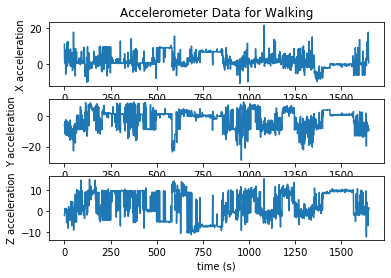

<Figure size 720x720 with 0 Axes>

In [68]:
plt.subplot(3, 1, 1)
plt.plot(df['timeElapsed'],df['x'])
plt.title('Accelerometer Data for Walking')
plt.ylabel('X acceleration')
plt.xlabel('time (s)')

plt.subplot(3, 1, 2)
plt.plot(df['timeElapsed'],df['y'])
plt.xlabel('time (s)')
plt.ylabel('Y acceleration')

plt.subplot(3, 1, 3)
plt.plot(df['timeElapsed'],df['z'])
plt.xlabel('time (s)')
plt.ylabel('Z acceleration')

plt.figure(figsize=(10,10))

plt.show();

# Preprocessing Phase


### Applying Low-Pass Filter to Acceleration Signals

In [69]:
X_acc=df['x'].values
Y_acc=df['y'].values
Z_acc=df['z'].values


In [152]:
def Filter (Data):
        a=0.05  # Cofficient of filter
        S=list(Data)  #convert acc data to list
        X=[]          #empty list to append filter data in it
        for i in range(0,len(S)):
            if i==0:
                X.append(a*S[i]) 
            else:
                X.append((1-a)*X[i-1]+a*S[i]) 
        return(X)


In [153]:
X_filtered=Filter(X_acc)
Y_filtered=Filter(Y_acc)
Z_filtered=Filter(Z_acc)

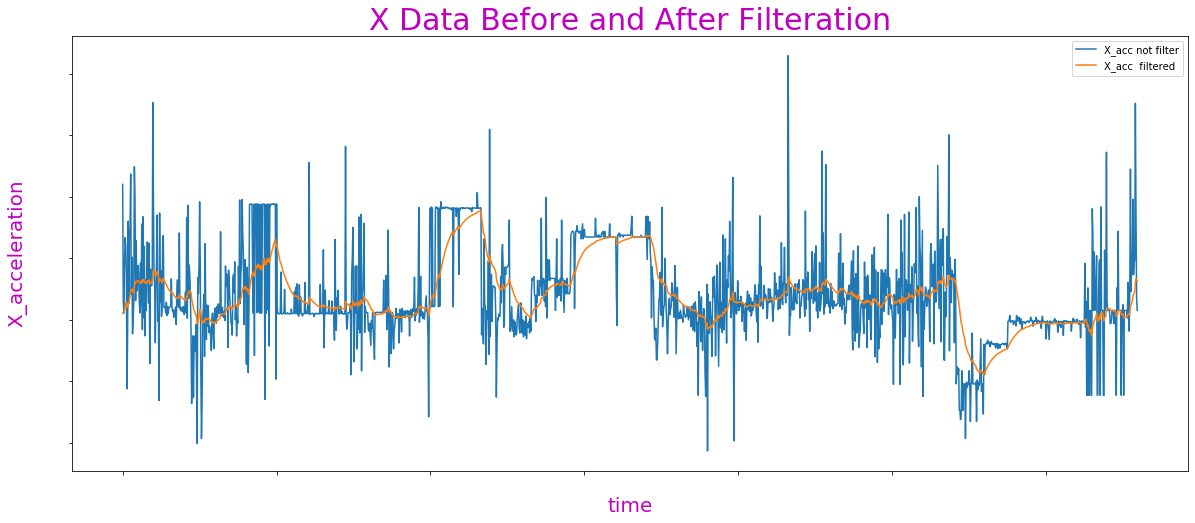

In [181]:
plt.figure(figsize=(20,8))
plt.plot(df['timeElapsed'],df['x'],label='X_acc not filter')
plt.plot(df['timeElapsed'],X_filtered,label='X_acc  filtered')
plt.title('X Data Before and After Filteration',color='m',fontsize=30)
plt.ylabel('X_acceleration',color='m',fontsize=20)
plt.xlabel('time',color='m',fontsize=20)
plt.xticks(fontsize=16,color='white')
plt.yticks(fontsize=16,color='white')
plt.legend()
plt.show()


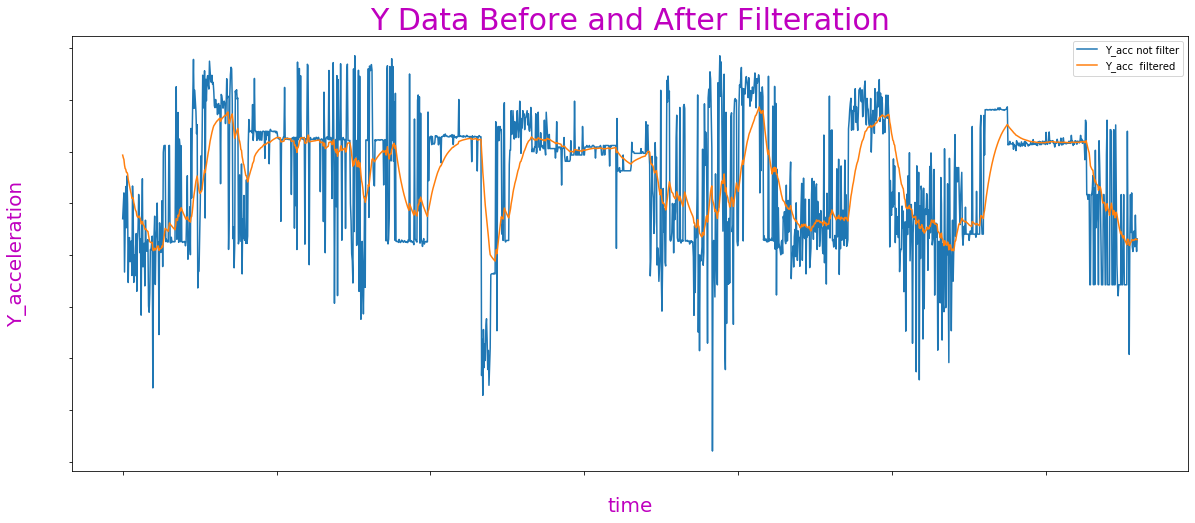

In [182]:
plt.figure(figsize=(20,8))
plt.plot(df['timeElapsed'],df['y'],label='Y_acc not filter')
plt.plot(df['timeElapsed'],Y_filtered,label='Y_acc  filtered')
plt.title('Y Data Before and After Filteration',color='m',fontsize=30)
plt.ylabel('Y_acceleration',color='m',fontsize=20)
plt.xlabel('time',color='m',fontsize=20)
plt.xticks(fontsize=16,color='white')
plt.yticks(fontsize=16,color='white')
plt.legend()

plt.show()

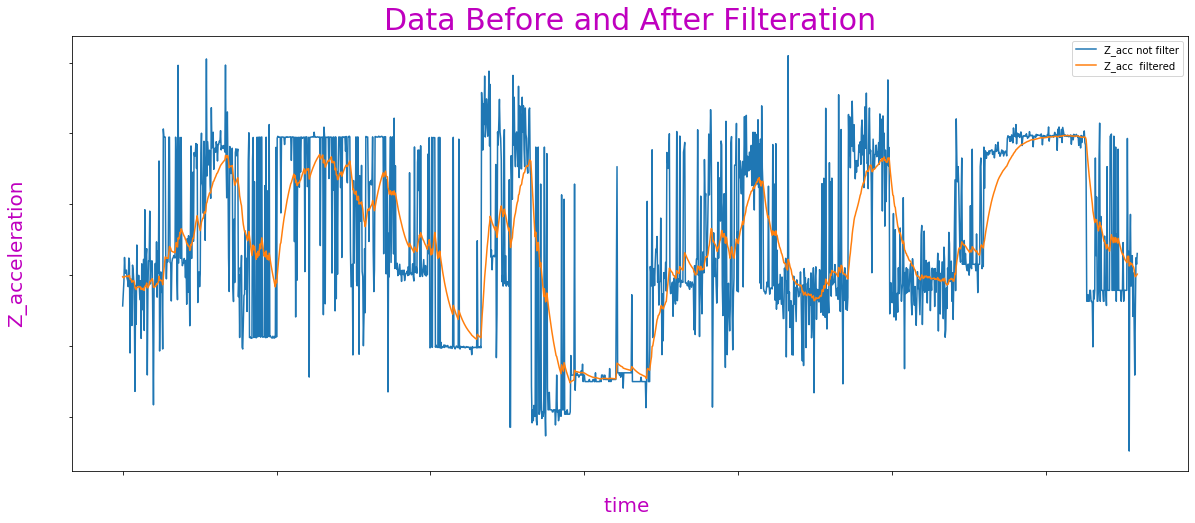

In [184]:
plt.figure(figsize=(20,8))
plt.plot(df['timeElapsed'],df['z'],label='Z_acc not filter')
plt.plot(df['timeElapsed'],Z_filtered,label='Z_acc  filtered')
plt.title('Data Before and After Filteration',color='m',fontsize=30)
plt.ylabel('Z_acceleration',color='m',fontsize=20)
plt.xlabel('time ',color='m',fontsize=20)
plt.xticks(fontsize=16,color='white')
plt.yticks(fontsize=16,color='white')
plt.legend()
plt.show()

### Apply smoothing to data

In [75]:
from scipy.ndimage import gaussian_filter1d
X_smoothed = gaussian_filter1d(X_filtered, 6)
Y_smoothed = gaussian_filter1d(Y_filtered, 6)
Z_smoothed = gaussian_filter1d(Z_filtered, 6)


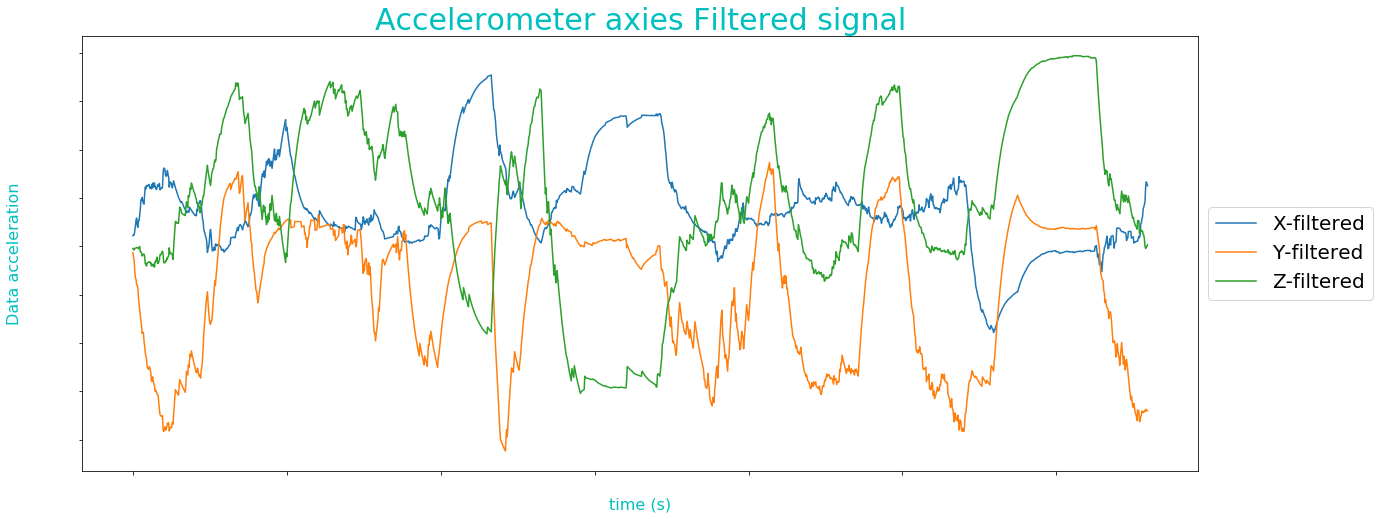

In [185]:
plt.figure(figsize=(20,8))
plt.plot(df['timeElapsed'],X_filtered,label='X-filtered')
plt.plot(df['timeElapsed'],Y_filtered,label='Y-filtered')
plt.plot(df['timeElapsed'],Z_filtered,label='Z-filtered')
plt.title('Accelerometer axies Filtered signal',color='c',fontsize=30)
plt.ylabel('Data acceleration',color='c',fontsize=16)
plt.xlabel('time (s)',color='c',fontsize=16)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),prop={'size': 20})
plt.xticks(fontsize=16,color='white')
plt.yticks(fontsize=16,color='white')
plt.show()

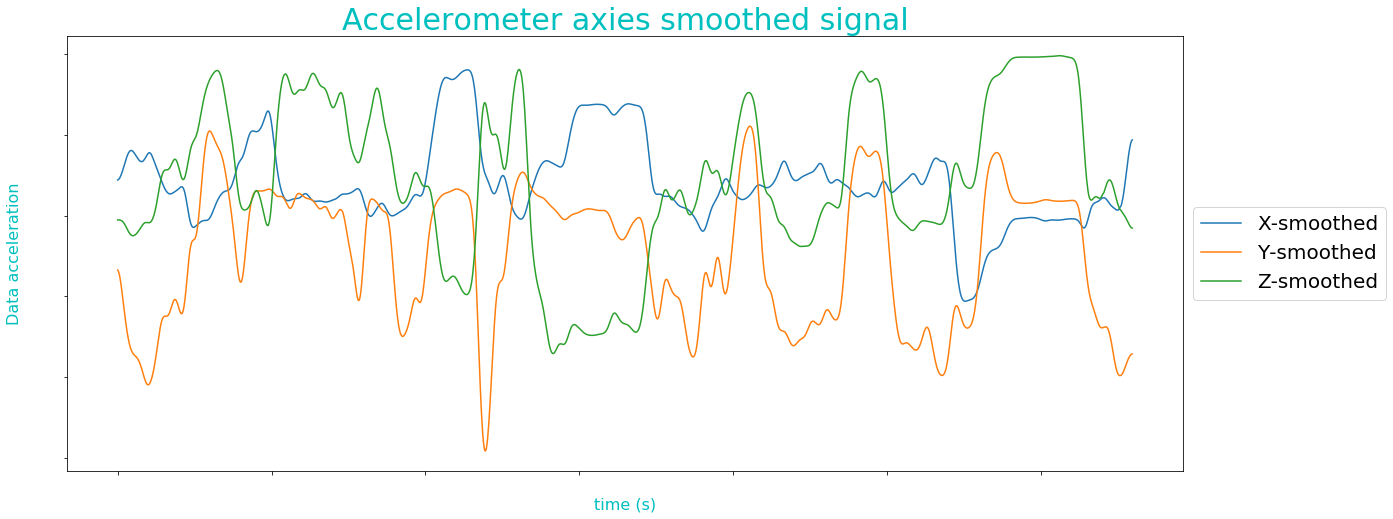

In [186]:
plt.figure(figsize=(20,8))
plt.plot(df['timeElapsed'],X_smoothed,label='X-smoothed')
plt.plot(df['timeElapsed'],Y_smoothed,label='Y-smoothed')
plt.plot(df['timeElapsed'],Z_smoothed,label='Z-smoothed')
plt.title('Accelerometer axies smoothed signal',color='c',fontsize=30)
plt.ylabel('Data acceleration',color='c',fontsize=16)
plt.xlabel('time (s)',color='c',fontsize=16)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),prop={'size': 20})
plt.xticks(fontsize=16,color='white')
plt.yticks(fontsize=16,color='white')
plt.show()

In [78]:
df['X_smoothed']=X_smoothed
df['Y_smoothed']=Y_smoothed
df['Z_smoothed']=Z_smoothed
df.head()

,timeElapsed,x,y,z,label,X_smoothed,Y_smoothed,Z_smoothed
0,0,11.02,-6.48,-2.17,Walking,2.202985,-3.367357,-0.264613
1,1,1.49,-5.28,-1.36,Walking,2.220810,-3.423737,-0.265323
2,2,0.55,-3.98,-0.43,Walking,2.256130,-3.534420,-0.267196
3,3,4.61,-11.64,1.25,Walking,2.308301,-3.695405,-0.271114
4,4,6.69,-7.76,0.21,Walking,2.376360,-3.901109,-0.278243


### Segmenation Process

In [79]:
x_list = []
y_list = []
z_list = []
train_labels = []

window_size = 10
step_size = 5

# creating overlaping windows of size window-size 100
for i in range(0, df.shape[0] - window_size, step_size):
    xs = df['X_smoothed'].values[i: i + 10]
    ys = df['Y_smoothed'].values[i: i + 10]
    zs = df['Z_smoothed'].values[i: i + 10]
    label = stats.mode(df['label'][i: i + 5])[0][0]

    x_list.append(xs)
    y_list.append(ys)
    z_list.append(zs)
    train_labels.append(label)

# Statistical Features on raw x, y and z in time domain
X_train = pd.DataFrame()

# mean
X_train['x_mean'] = pd.Series(x_list).apply(lambda x: x.mean())
X_train['y_mean'] = pd.Series(y_list).apply(lambda x: x.mean())
X_train['z_mean'] = pd.Series(z_list).apply(lambda x: x.mean())

# std dev
X_train['x_std'] = pd.Series(x_list).apply(lambda x: x.std())
X_train['y_std'] = pd.Series(y_list).apply(lambda x: x.std())
X_train['z_std'] = pd.Series(z_list).apply(lambda x: x.std())

# avg absolute diff
X_train['x_aad'] = pd.Series(x_list).apply(lambda x: np.mean(np.absolute(x - np.mean(x))))
X_train['y_aad'] = pd.Series(y_list).apply(lambda x: np.mean(np.absolute(x - np.mean(x))))
X_train['z_aad'] = pd.Series(z_list).apply(lambda x: np.mean(np.absolute(x - np.mean(x))))

# min
X_train['x_min'] = pd.Series(x_list).apply(lambda x: x.min())
X_train['y_min'] = pd.Series(y_list).apply(lambda x: x.min())
X_train['z_min'] = pd.Series(z_list).apply(lambda x: x.min())

# max
X_train['x_max'] = pd.Series(x_list).apply(lambda x: x.max())
X_train['y_max'] = pd.Series(y_list).apply(lambda x: x.max())
X_train['z_max'] = pd.Series(z_list).apply(lambda x: x.max())

# max-min diff
X_train['x_maxmin_diff'] = X_train['x_max'] - X_train['x_min']
X_train['y_maxmin_diff'] = X_train['y_max'] - X_train['y_min']
X_train['z_maxmin_diff'] = X_train['z_max'] - X_train['z_min']

# median
X_train['x_median'] = pd.Series(x_list).apply(lambda x: np.median(x))
X_train['y_median'] = pd.Series(y_list).apply(lambda x: np.median(x))
X_train['z_median'] = pd.Series(z_list).apply(lambda x: np.median(x))

# median abs dev 
X_train['x_mad'] = pd.Series(x_list).apply(lambda x: np.median(np.absolute(x - np.median(x))))
X_train['y_mad'] = pd.Series(y_list).apply(lambda x: np.median(np.absolute(x - np.median(x))))
X_train['z_mad'] = pd.Series(z_list).apply(lambda x: np.median(np.absolute(x - np.median(x))))

# interquartile range
X_train['x_IQR'] = pd.Series(x_list).apply(lambda x: np.percentile(x, 75) - np.percentile(x, 25))
X_train['y_IQR'] = pd.Series(y_list).apply(lambda x: np.percentile(x, 75) - np.percentile(x, 25))
X_train['z_IQR'] = pd.Series(z_list).apply(lambda x: np.percentile(x, 75) - np.percentile(x, 25))

# negtive count
X_train['x_neg_count'] = pd.Series(x_list).apply(lambda x: np.sum(x < 0))
X_train['y_neg_count'] = pd.Series(y_list).apply(lambda x: np.sum(x < 0))
X_train['z_neg_count'] = pd.Series(z_list).apply(lambda x: np.sum(x < 0))

# positive count
X_train['x_pos_count'] = pd.Series(x_list).apply(lambda x: np.sum(x > 0))
X_train['y_pos_count'] = pd.Series(y_list).apply(lambda x: np.sum(x > 0))
X_train['z_pos_count'] = pd.Series(z_list).apply(lambda x: np.sum(x > 0))

# values above mean
X_train['x_above_mean'] = pd.Series(x_list).apply(lambda x: np.sum(x > x.mean()))
X_train['y_above_mean'] = pd.Series(y_list).apply(lambda x: np.sum(x > x.mean()))
X_train['z_above_mean'] = pd.Series(z_list).apply(lambda x: np.sum(x > x.mean()))

# number of peaks
X_train['x_peak_count'] = pd.Series(x_list).apply(lambda x: len(find_peaks(x)[0]))
X_train['y_peak_count'] = pd.Series(y_list).apply(lambda x: len(find_peaks(x)[0]))
X_train['z_peak_count'] = pd.Series(z_list).apply(lambda x: len(find_peaks(x)[0]))

# skewness
X_train['x_skewness'] = pd.Series(x_list).apply(lambda x: stats.skew(x))
X_train['y_skewness'] = pd.Series(y_list).apply(lambda x: stats.skew(x))
X_train['z_skewness'] = pd.Series(z_list).apply(lambda x: stats.skew(x))

# kurtosis
X_train['x_kurtosis'] = pd.Series(x_list).apply(lambda x: stats.kurtosis(x))
X_train['y_kurtosis'] = pd.Series(y_list).apply(lambda x: stats.kurtosis(x))
X_train['z_kurtosis'] = pd.Series(z_list).apply(lambda x: stats.kurtosis(x))

# energy
X_train['x_energy'] = pd.Series(x_list).apply(lambda x: np.sum(x**2)/10)
X_train['y_energy'] = pd.Series(y_list).apply(lambda x: np.sum(x**2)/10)
X_train['z_energy'] = pd.Series(z_list).apply(lambda x: np.sum(x**2/10))

# avg resultant
X_train['avg_result_accl'] = [i.mean() for i in ((pd.Series(x_list)**2 + pd.Series(y_list)**2 + pd.Series(z_list)**2)**0.5)]

# signal magnitude area
X_train['sma'] =    pd.Series(x_list).apply(lambda x: np.sum(abs(x)/10)) + pd.Series(y_list).apply(lambda x: np.sum(abs(x)/100)) \
                  + pd.Series(z_list).apply(lambda x: np.sum(abs(x)/10))

In [80]:
X_train.shape

(328, 50)

In [81]:
df_New=X_train


In [82]:
X=X_train
y=np.array(train_labels)

In [83]:
X.shape

(328, 50)

In [84]:
y.shape

(328,)

# Classification Phase

> **You Can Comment and Uncomment using ( ctrl + / ) **

> **You Can found this  /   in numpad idot  :D**

### Splitting data to train and test

In [85]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
import seaborn as sns
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=49)

During train uncomment this cell

In [86]:
print('X_train_shape ---->',X_train.shape)
print('X_test_shape ---->',X_test.shape)
print('Y_train_shape ---->',y_train.shape)
print('Y_test_shape ---->',y_test.shape)

X_train_shape ----> (229, 50)
X_test_shape ----> (99, 50)
Y_train_shape ----> (229,)
Y_test_shape ----> (99,)


During train uncomment this cell

### Preprocessimg label data and feature

In [93]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
y_labeled=le.fit_transform(y_train)
y_labeled_test=le.transform(y_test)
Y_all=le.transform(y)
# y_independent=le.fit_transform(y)
# y_independent.shape

In [88]:
z=le.inverse_transform(np.unique(y_independent))


In [89]:
z

array(['Downstairs', 'Sitting', 'Standing', 'Upstairs', 'Walking'],
      dtype='<U10')

During train uncomment this line and change y to y_train

In [92]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_Scaler_train=sc.fit_transform(X_train)
x_Scaler_test=sc.transform(X_test)
X_all=sc.transform(X)
# x_independent=sc.fit_transform(X)
# x_independent.shape

During train uncomment this line and change X to X_train

### Using Support vector machine Classification

In [94]:
from sklearn.svm import SVC
classifier_SVC=SVC(kernel = 'rbf')
classifier_SVC.fit(x_Scaler_train,y_labeled)
cv_svm_train = cross_val_score(classifier_SVC , X_all , Y_all, cv = 3)
print("Cross validation for train data SVC is : ", cv_svm_train.mean())




Cross validation for train data SVC is :  0.3108423686405338


During train uncomment this cell

Confusion matrix is :
  [[ 5  0  5  5  7]
 [ 0 22  0  2  0]
 [ 1  0  8  0  3]
 [ 3  0  3  2  5]
 [ 4  7  5  0 12]]


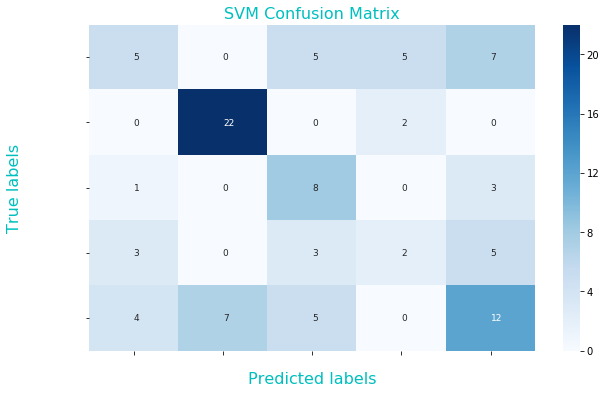

In [172]:
y_pred_SVC=classifier_SVC.predict(x_Scaler_test)
cm = confusion_matrix(y_labeled_test,y_pred_SVC)
print("Confusion matrix is :\n ", cm)

annot_kws = {"ha": 'left',"va": 'center','size': 9}
plt.figure(figsize=(10,6))
ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g',cmap = 'Blues',annot_kws=annot_kws, ax=ax); 
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
# labels, title and ticks
ax.set_xlabel('Predicted labels',fontsize=16,color='c')
ax.set_ylabel('True labels',fontsize=16,color='c'); 
ax.set_title('SVM Confusion Matrix',fontsize=16,color='c'); 
plt.xticks(fontsize=10,color='white')
plt.yticks(fontsize=10,color='white',rotation=0)
ax.xaxis.set_ticklabels(z);
ax.yaxis.set_ticklabels(z);



During train uncomment this cell

### Using KNN Classification

In [96]:
acc = []
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
for i in range(1,40):
    neigh = KNeighborsClassifier(n_neighbors = i, metric = 'minkowski',p=1).fit(x_Scaler_train, y_labeled)
    yhat = neigh.predict(x_Scaler_test)
    acc.append(metrics.accuracy_score(y_labeled_test, yhat))
    
print("Maximum accuracy:-",max(acc),"at K =",acc.index(max(acc)))

Maximum accuracy:- 0.6464646464646465 at K = 0


In [97]:
from sklearn.neighbors import KNeighborsClassifier
classifier_KNN = KNeighborsClassifier(n_neighbors = 4, metric = 'minkowski', p = 1)
classifier_KNN.fit(x_Scaler_train, y_labeled)
cv_knn_train = cross_val_score(classifier_KNN ,  X_all , Y_all, cv = 3)
print("Cross validation for train data KNN is : ", cv_knn_train.mean())



# cv_knn_test = cross_val_score(classifier_KNN , x_Scaler_test , y_labeled_test, cv = 3)
# print("Cross validation for test data KNN is : ", cv_knn_test.mean())


Cross validation for train data KNN is :  0.3658048373644704


During train uncomment this cell

Confusion matrix is :
  [[ 7  0  9  2  4]
 [ 0 21  0  2  1]
 [ 3  0  9  0  0]
 [ 3  0  5  4  1]
 [ 7  2  1  0 18]]


(array([0.5, 1.5, 2.5, 3.5, 4.5]), <a list of 5 Text yticklabel objects>)

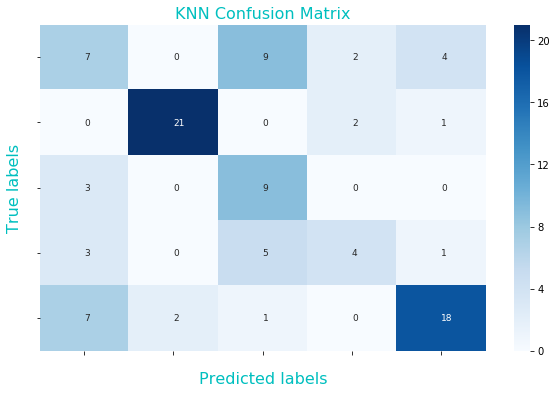

In [171]:
y_pred_Knn = classifier_KNN.predict(x_Scaler_test)
cm = confusion_matrix(y_labeled_test, y_pred_Knn)
print("Confusion matrix is :\n ", cm)
annot_kws = {"ha": 'left',"va": 'center','size': 9}
plt.figure(figsize=(10,6))
ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g',cmap = 'Blues',annot_kws=annot_kws, ax=ax); 
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
# labels, title and ticks
ax.set_xlabel('Predicted labels',fontsize=16,color='c')
ax.set_ylabel('True labels',fontsize=16,color='c'); 
ax.set_title('KNN Confusion Matrix',fontsize=16,color='c') 
plt.xticks(fontsize=10,color='white')
plt.yticks(fontsize=10,color='white',rotation=0)



During train uncomment this cell

### Using Random forest Classifier

In [100]:
acc = []
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
for i in range(1,50):
    neigh = RandomForestClassifier(n_estimators =i, criterion = 'entropy',random_state=49).fit(x_Scaler_train,y_labeled)
    yhat = neigh.predict(x_Scaler_test)
    acc.append(metrics.accuracy_score(y_labeled_test, yhat))
    
print("Maximum accuracy:-",max(acc),"at K =",acc.index(max(acc)))

Maximum accuracy:- 0.7575757575757576 at K = 42


In [102]:
from sklearn.ensemble import RandomForestClassifier
classifier_RF = RandomForestClassifier(n_estimators = 42, criterion = 'entropy',random_state=49)
classifier_RF.fit(x_Scaler_train, y_labeled)
cv_rf_train = cross_val_score(classifier_RF , X_all , Y_all, cv = 3)
print("Cross validation for train data RF is : ", cv_rf_train.mean())
# cv_rf_test = cross_val_score(classifier_RF , x_Scaler_test , y_labeled_test, cv = 3)
# print("Cross validation for test data RF is : ", cv_rf_test.mean())



Cross validation for train data RF is :  0.43589102029469


During train uncomment this cell

Confusion matrix is :
  [[13  0  2  5  2]
 [ 0 22  0  1  1]
 [ 2  0  9  1  0]
 [ 1  0  1  8  3]
 [ 2  2  2  1 21]]


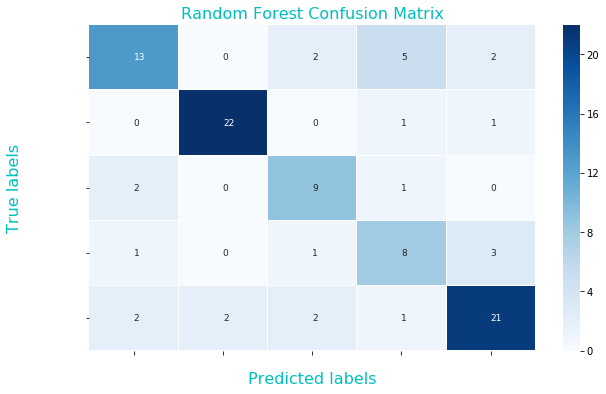

In [169]:
y_pred_RF= classifier_RF.predict(x_Scaler_test)
cm = confusion_matrix(y_labeled_test, y_pred_RF)
print("Confusion matrix is :\n ", cm)

annot_kws = {"ha": 'left',"va": 'center','size': 9}
plt.figure(figsize=(10,6))
ax= plt.subplot()
sns.heatmap(cm, annot=True,linewidths = 0.1, fmt='d', cmap = 'Blues',annot_kws=annot_kws, ax=ax); 
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
# labels, title and ticks
ax.set_xlabel('Predicted labels',fontsize=16,color='c')
ax.set_ylabel('True labels',fontsize=16,color='c'); 
ax.set_title('Random Forest Confusion Matrix',fontsize=16,color='c'); 
plt.xticks(fontsize=10,color='white')
plt.yticks(fontsize=10,color='white',rotation=0)
ax.xaxis.set_ticklabels(z);
ax.yaxis.set_ticklabels(z);

During train uncomment this cell

### Using Decision Tree Classifier

In [133]:
acc = []
from sklearn import tree
from sklearn import metrics
for i in range(1,50):
    neigh = tree.DecisionTreeClassifier(max_depth  =i, criterion = 'entropy',random_state=49).fit(x_Scaler_train,y_labeled)
    yhat = neigh.predict(x_Scaler_test)
    acc.append(metrics.accuracy_score(y_labeled_test, yhat))
    
print("Maximum accuracy:-",max(acc),"at K =",acc.index(max(acc)))

Maximum accuracy:- 0.6565656565656566 at K = 4


In [134]:
from sklearn import tree
classifier_DT = tree.DecisionTreeClassifier(max_depth = 4,criterion = 'entropy',random_state=49)
classifier_DT.fit(x_Scaler_train, y_labeled)
cv_dt_train = cross_val_score(classifier_DT ,  X_all , Y_all, cv = 3)
print("Cross validation for train data DT is : ", cv_dt_train.mean())
# cv_dt_test = cross_val_score(classifier_DT , x_Scaler_test , y_labeled_test, cv = 3)
# print("Cross validation for test data DT is : ", cv_dt_test.mean())


Cross validation for train data DT is :  0.36869613566861276


During train uncomment this cell

Confusion matrix is :
  [[14  0  1  5  2]
 [ 1 20  0  2  1]
 [ 6  0  6  0  0]
 [ 4  0  4  4  1]
 [ 7  3  0  3 15]]


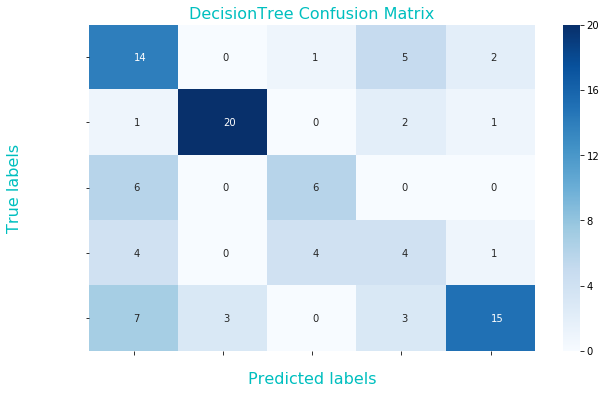

In [168]:
y_pred_DT=classifier_DT.predict(x_Scaler_test)

cm = confusion_matrix(y_labeled_test, y_pred_DT)
print("Confusion matrix is :\n ", cm)
annot_kws = {"ha": 'left',"va": 'center','size': 10}
plt.figure(figsize=(10,6))
ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', cmap = 'Blues',annot_kws=annot_kws, ax=ax); 
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
# labels, title and ticks
ax.set_xlabel('Predicted labels',fontsize=16,color='c')
ax.set_ylabel('True labels',fontsize=16,color='c'); 
ax.set_title('DecisionTree Confusion Matrix',fontsize=16,color='c'); 
plt.xticks(fontsize=10,color='white')
plt.yticks(fontsize=10,color='white',rotation=0)
ax.xaxis.set_ticklabels(z);
ax.yaxis.set_ticklabels(z);

During train uncomment this cell

### Using Navie Bayes Classifier

In [107]:
from sklearn.naive_bayes import GaussianNB
classifier_NB = GaussianNB()
classifier_NB.fit(x_Scaler_train, y_labeled)
cv_nv_train = cross_val_score(classifier_NB ,cmap = 'Blues',  X_all , Y_all, cv = 3)
print("Cross validation for train data NB is : ", cv_nv_train.mean())



Cross validation for train data NB is :  0.3080344731720878


During train uncomment this cell

Confusion matrix is :
  [[ 8  0  5  3  6]
 [ 0 15  1  3  5]
 [ 0  0 11  0  1]
 [ 4  0  8  0  1]
 [ 9  2  8  0  9]]


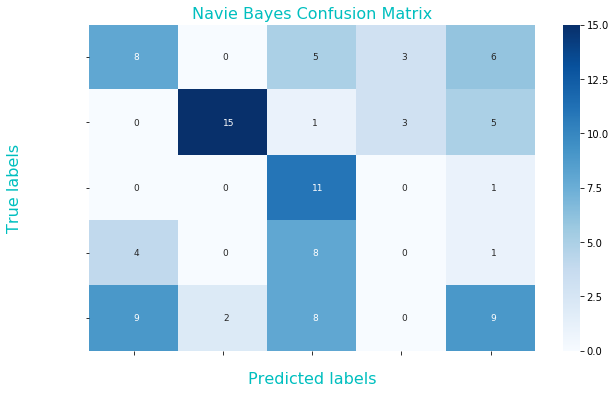

In [167]:
y_pred_NB = classifier_NB.predict(x_Scaler_test)
cm = confusion_matrix(y_labeled_test, y_pred_NB)
print("Confusion matrix is :\n ", cm)
annot_kws = {"ha": 'left',"va": 'center','size': 9}
plt.figure(figsize=(10,6))
ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g',cmap = 'Blues',annot_kws=annot_kws, ax=ax); 
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
# labels, title and ticks
ax.set_xlabel('Predicted labels',fontsize=16,color='c')
ax.set_ylabel('True labels',fontsize=16,color='c'); 
ax.set_title('Navie Bayes Confusion Matrix',fontsize=16,color='c'); 
plt.xticks(fontsize=10,color='white')
plt.yticks(fontsize=10,color='white',rotation=0)
ax.xaxis.set_ticklabels(z);
ax.yaxis.set_ticklabels(z);

During train uncomment this cell

### Showing Accuracy using accuracy_score

In [138]:
from sklearn.metrics import  accuracy_score

print('Accuracy of SVC          --------->',round(accuracy_score(y_labeled_test, y_pred_SVC),2))
print('Accuracy of Desicion Tree--------->',round(accuracy_score(y_labeled_test, y_pred_DT),2))
print('Accuracy of Random forest--------->',round(accuracy_score(y_labeled_test, y_pred_RF),2))
print('Accuracy of KNN          --------->',round(accuracy_score(y_labeled_test, y_pred_Knn),2))
print('Accuracy of Navie Bayes  --------->',round(accuracy_score(y_labeled_test, y_pred_NB),2))  

Accuracy of SVC          ---------> 0.49
Accuracy of Desicion Tree---------> 0.6
Accuracy of Random forest---------> 0.74
Accuracy of KNN          ---------> 0.6
Accuracy of Navie Bayes  ---------> 0.43


In [346]:
import joblib
 
# Save the model as a pickle in a file
joblib.dump(classifier_RF, 'RandomForest.pkl')
joblib.dump(classifier_NB, 'naviebayes.pkl')
joblib.dump(classifier_DT, 'descisiontree.pkl')
joblib.dump(classifier_SVC, 'svc.pkl')
joblib.dump(classifier_KNN, 'knn.pkl')


['knn.pkl']

In [410]:
# Load the model from the file
import joblib
rf_from_joblib = joblib.load('RandomForest.pkl')
nb_from_joblib = joblib.load('naviebayes.pkl')
dt_from_joblib = joblib.load('descisiontree.pkl')
svc_from_joblib = joblib.load('svc.pkl')
knn_from_joblib = joblib.load('knn.pkl')
y_prediction_test_SVC=svc_from_joblib.predict(x_independent)
y_prediction_test_KNN=knn_from_joblib.predict(x_independent)
y_prediction_test_RF=rf_from_joblib.predict(x_independent)
y_prediction_test_DT=dt_from_joblib.predict(x_independent)
y_prediction_test_NB=nb_from_joblib.predict(x_independent)


During train uncomment this cell

In [104]:
y_prediction_test_SVC=classifier_SVC.predict(x_independent)
y_prediction_test_KNN=classifier_KNN.predict(x_independent)
y_prediction_test_RF=classifier_RF.predict(x_independent)
y_prediction_test_DT=classifier_DT.predict(x_independent)
y_prediction_test_NB=classifier_NB.predict(x_independent)


During train **comment** this cell

In [105]:
from sklearn.metrics import  accuracy_score
print('Accuracy of SVC          --------->',round(accuracy_score(y_independent, y_prediction_test_SVC),2))
print('Accuracy of Desicion Tree--------->',round(accuracy_score(y_independent, y_prediction_test_KNN),2))
print('Accuracy of Random forest--------->',round(accuracy_score(y_independent, y_prediction_test_RF),2))
print('Accuracy of KNN          --------->',round(accuracy_score(y_independent, y_prediction_test_DT),2))
print('Accuracy of Navie Bayes  --------->',round(accuracy_score(y_independent, y_prediction_test_NB),2))

Accuracy of SVC          ---------> 0.75
Accuracy of Desicion Tree---------> 0.68
Accuracy of Random forest---------> 0.73
Accuracy of KNN          ---------> 0.69
Accuracy of Navie Bayes  ---------> 0.73


During train **comment** this cell

Confusion matrix is :
  [[ 1  0  3  0  0]
 [ 0  0  2  0  0]
 [ 0  0  0  3  0]
 [10  2  2  0  5]
 [ 0  0  0  0  0]]


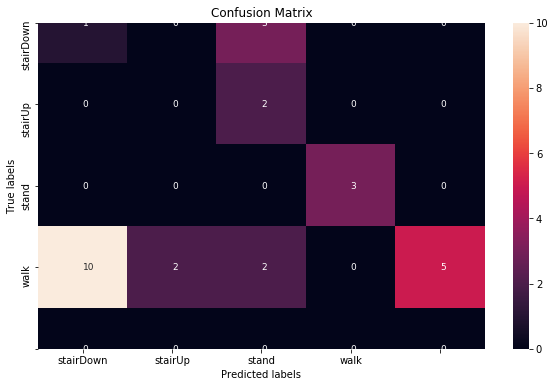

In [412]:
from sklearn.metrics import  confusion_matrix
cm = confusion_matrix(y_independent, y_prediction_test_RF)
print("Confusion matrix is :\n ", cm)
annot_kws = {"ha": 'left',"va": 'center','size': 9}
plt.figure(figsize=(10,6))
ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g',annot_kws=annot_kws, ax=ax); 
# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(z);
ax.yaxis.set_ticklabels(z);

In [114]:
y_prediction_test_KNN

array([2, 0, 4, 0, 5, 0, 0, 1, 5, 0, 0, 3, 3, 3, 3, 1, 0, 0, 1, 1, 5, 1,
       5, 0, 1, 5, 5, 1, 1, 0, 0, 5, 4, 5, 5, 3, 5, 1, 5, 1, 1, 1, 5, 5,
       1, 1, 1, 5, 5, 2, 0, 1, 0, 5, 5, 5, 4, 4, 1, 1, 0, 5, 5, 0, 4, 0,
       5, 5, 5, 0, 5, 5, 0, 0], dtype=int64)